# Hw 4: More Linear Regression 🎢

Name: Jeff Che

Student ID: 464957

Collaborators:

## Instructions

For this homework, work through **Lab 4 (Predicting Housing Prices with Linear Regression)** first. Most of the things we ask you to do in this homework are explained in the lab. In general, you should feel free to import any package that we have previously used in class. Ensure that all plots have the necessary components that a plot should have (e.g. axes labels, a title, a legend).

Furthermore, in addition to recording your collaborators on this homework, please also remember to cite/indicate all external sources used when finishing this assignment. This includes peers, TAs, and links to online sources. Note that these citations will be taken into account during the grading and regrading process.


### Submission instructions
* Submit this python notebook including your answers in the code cells as homework submission.
* **Do not change the number of cells!** Your submission notebook should have exactly one code cell per problem. 
* Do **not** remove the `# your code here` line and add you solution after that line. 

## 1. Reviewing Regression

Let's warm up by considering a few facts about regression. You may refer to your notes, lecture slides, worksheet, and lab to help you answer these questions.

### Problem 1.1

**Write-up!** What distinquishes regression tasks from classification and clustering tasks? Consider the input features and outputs of models from each type.

### Problem 1.2

**Write-up!** Describe the procedure for "fitting" a linear regression model. What are the model's parameters and how many of them are there (if we consider each term in $w$ to be a separate parameter)? How do we find the optimal parameters for fitting our training data?

### Problem 1.3

**Write-up!** Given two linear models, how do we decide which one fits the data _better_?

### Problem 1.4

**Write-up!** What is training error? What is testing error? What are their interpretations in the context of the data?

### Problem 1.5

**Write-up!** Consider two models: the first is a linear model; the second is a polynomial model. The second model is more complex. Describe a situation where the polynomial model performs better (has less error) during training but the linear model performs better during testing. What is the name for what happened to the polynomial model?

## 2. Linear Regression with More Features

In this week's lab, we implemented a linear regression model that could map a single predictor feature to a target variable. In the case of the Boston housing dataset, we could map features like the "average number of rooms per dwelling" to a house's price. In reality, however, a single predictor is not enough to get a good model. Additionally, we have data for several predictors so why not make use of that?

In this series of problems, let's explore how we can build a multi-dimensional linear model.

### Scikit-Learn

Generalizing our derivation of 1D linear regression to many-dimensionional is non-trivial since we would need to convert our computations into matrix operations, which are beyond the scope of this class. However, that does not mean that we can't
do many-dimensional linear regression. The package we will introduce today is [Scikit-learn](https://scikit-learn.org/stable/). It contains many generalized implementations of common learning models and we will be using its implementation of multi-dimensional linear regression here.

You have already seen Scikit-learn, or `sklearn`, before since that is where we got our Boston housing data in the lab.

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
X, y = boston.data, boston.target

Using `sklearn` is very similar to our implementation from the lab, though there is a slight difference: we work with a model object. In the following cell, we create an instance of linear regression model called `model`.

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

The `fit` and `predict` functions that we used previously are analogous to the `fit` and `predict` methods of `model`. Here is a quick example of how to perform 1D linear regression mapping the `CRIM` predictor to housing price.

In [4]:
target = 'CRIM'
x_crim = X[:, boston.feature_names.tolist().index(target)].reshape(-1, 1)

# you should create a new model object for each new model you create
model = LinearRegression()

# fitting the model
model.fit(x_crim, y)

# predicting with the model
import numpy as np

x_star = np.linspace(x_crim.min(), x_crim.max(), 1001).reshape(-1, 1)
model.predict(x_star)

array([ 24.03048217,  23.99354274,  23.95660331, ..., -12.83506817,
       -12.8720076 , -12.90894703])

### Problem 2.1

**Write-up!** There are several things wrong with the example above. What do you see? `HINT`: think back to the model building part of the data science workflow.

### Problem 2.2

Now that we are familiar with `sklearn`, let's start building a linear model that uses all of the features in our dataset. You can refer to the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more information about how to use `LinearRegression`.

**Try this!** Build a model that uses _all_ of the predictor features in the Boston housing dataset. Remember to create a new instance of `LinearRegression` and assign it to the `model` variable. Also make sure that you do a train/test split of your data so we can evaluate our model after training (use `random_state=10` so we can compare our results to the ones from `Lab4`; refer to the lab for an example of how to do this). If you were successful, you will see the weights for the model below.

In [5]:
from sklearn.model_selection import train_test_split

# your code here

model = LinearRegression() #make model object

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10) #split data into test and training sets

model.fit(X_train, y_train) #fit on training set

model.predict(X_test) #predict of test set

import numpy as np

# Get the model parameters
b = model.intercept_
w = model.coef_
print(b)
print(w)

# Now, w is a vector! With a weight parameter for every feature.
print(w.shape)

36.53305138282441
[-1.28180656e-01  6.31981786e-02 -7.57627602e-03  1.97451452e+00
 -1.62719890e+01  3.10845625e+00  1.62922153e-02 -1.48301360e+00
  3.03988206e-01 -1.20820710e-02 -8.20305699e-01  1.14189890e-02
 -5.81626431e-01]
(13,)


### Problem 2.3

Now that we have a trained model, we can use it to make some predictions using the testing set.

**Try this!** Use your model to compute the predicted prices of the points in your testing set and store these into the variable `y_prediction`. Then, compute the RMSE of these predictions and store the value in `rmse`. If all went well you should see the RMSE value you computed as the output of the cell.

In [6]:
# your code here

from sklearn.metrics import mean_squared_error
from math import sqrt

y_prediction = model.predict(X_test) #y pred from x test

#rmse between y pred and y test
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))

assert np.isscalar(rmse), 'RMSE should be a scalar value'

f'RMSE: {rmse}'

'RMSE: 5.866341999333012'

### Problem 2.4

Let's talk about this result.

**Write-up!** What did you notice about this result and how does it compare to those of individual predictors from `Lab4`? Is this what you expected to see?

## 3. Introducing a New Metric

RMSE is a good measure for how well a model fits, but one could argue it is not the most intuitive. An alternative measure is $R^2$, or the **coefficient of determination**, which is essentially a measure of how close the data are to the fitted regression line. Whereas RMSE is a number in the units of the original target variable, $R^2$ is a value between 0 and 1, where increasing values indicate better fit. In this way, $R^2$ is a good place to start when evaluating a regression model because it is easy to interpret.

$$R^2 = 1 - \frac{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - f(x_i))^2}{\displaystyle \frac{1}{n} \sum_{n=1}^n (y_i - \bar y)^2}$$

> _For those who are interested_: Those of you that are statistically savvy, or just simply read the lab, will remember that these sums are mean squared errors. The numerator is the MSE of the true values compared to the predicted value and the denominator is the MSE of the true value relative to the mean value. The denominator is the variance of the response variable (eg. house price). One way to interpret this metric is that it computes the the ratio between how much variation is explained by the model and the total variation in the data.

### Problem 3.1

**Try this!** Complete the function below so that it computes the $R^2$ value of a model given some `predictions` and their true `labels`. To receive full credit, implement the math yourself; do not rely on other, already implemented functions. Store your computed result in the `r2` variable.

> Do **not** use any built-in functions from scikit-learn for this problem. 

In [7]:
def r_squared(predictions, labels):
    '''computes the r-squared metric of a model given some PREDICTIONS and their true LABELS'''
    
    # your code here
    sum1 = 0
    sum2 = 0
    sum_mean = 0
    
    for i in range(len(labels)):
        sum_mean += labels[i]
    
    y_mean = sum_mean/len(labels)
    
    for i in range(len(predictions)):
        sum1 += (labels[i] - predictions[i])**2
        sum2 += (labels[i] - y_mean)**2
        
    r2 = 1 - (sum1/sum2)
    
    assert np.isscalar(r2), 'R2 should be a scalar value'
    
    return r2

If your computation is correct, the following assertion will run without error.

In [8]:
assert np.isclose(r_squared(y_prediction, y_test), model.score(X_test, y_test)), 'The value computed was incorrect'

## 4. Using a More Complex Model

There are a lot of options we can choose from when it comes to picking a model to use when analyzing our data. In this section, we will take a look at a more complex model: **polynomial regression**. We will also investigate some of the considerations one should make when picking a model.

![poly_reg](utility/pics/poly-regression.png)

### Back to Toy Data

As mentioned in earlier, it is really hard to visualize many-dimensional datasets so for this section we will fall back to the toy data we used from `Lab4`.

In [9]:
x, y = np.loadtxt('utility/data/toy_data.txt')

Polynomial regression models are really just extensions of the linear models that we are already familiar with. The difference comes from how we preprocess our data. The specifics of how this works is beyond the scope of this course (see CSE417 for more information).

In order to build a polynomial model, we will need to do some preparation. `sklearn`'s models require that the input data is a $n$-dimensional array. Since our input array `x` is a 1D array for the toy data set, we will need to do is to reshape it into a 2D array. The function in the following cell, `reshape` will take care of this for you — use it when applicable.

In [10]:
reshape = lambda x: x.reshape(-1, 1)

### Problem 4.1

The next thing we will need to do is to fit a linear model that will serve as our baseline.

**Try this!** Create a new linear model and fit it with the toy data set and create a plot showing the scattered data points `x, y` and the predicted values of fthe model. You don't need to worry about making a train/test split for this section.

Plots configured! 📊


Text(0.5, 1.0, 'Toy Data: training vs. linear model')

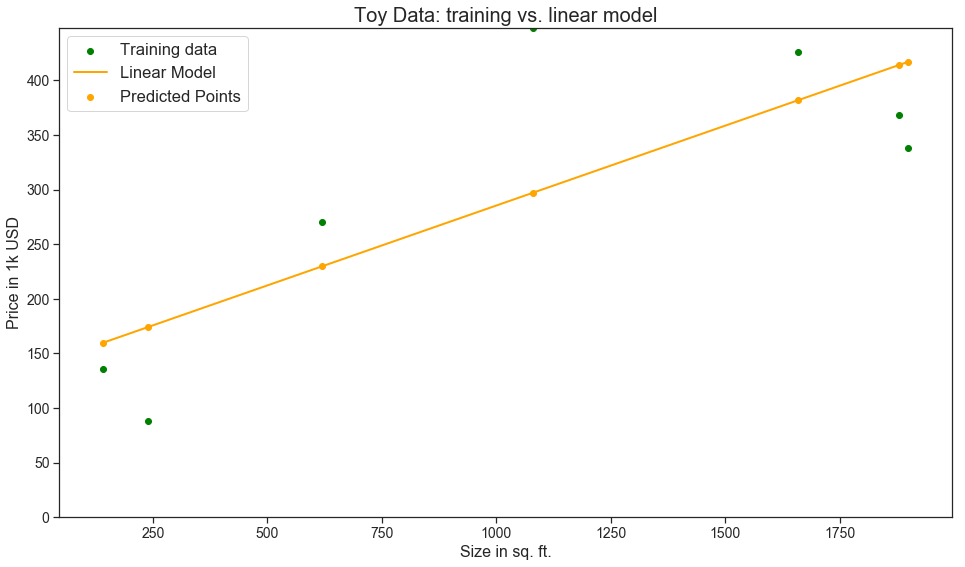

In [126]:
import matplotlib.pyplot as plt
from utility.util import configure_plots

configure_plots() # for pretty plots

# your code here

linear_model = LinearRegression()

linear_model.fit(reshape(x), y)

y_pred = linear_model.predict(reshape(x))

ax1 = plt.scatter(x, y, color="green") #x, y
ax3 = plt.scatter(x, y_pred, color="orange") #prediction from model
ax2, = plt.plot(x, y_pred, color="orange")
plt.ylim(0, y.max())
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price in 1k USD")
plt.legend((ax1, ax2, ax3), ('Training data', 'Linear Model', 'Predicted Points'))
plt.title("Toy Data: training vs. linear model")

### Doing Polynomial Regression

Next, let's implement a function that produces fitted polynomial regression models. Again, you don't need to worry too much about how this works.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def make_poly(x, y, degree):
    '''creates and returns a polynomial regression model fit with input data X and Y'''
    
    polynomial_features = PolynomialFeatures(degree=degree)
    poly_model = Pipeline([("polynomial_features", polynomial_features),
                           ("linear_regression", LinearRegression())])

    return poly_model.fit(reshape(x), y)

### Problem 4.2

Let's try using the `make_poly` function.

**Try this!** Use `make_poly` to, well, make a polynomial regression model with a `degree` of 2. This model will fit the data with a quadratic function. Store the model you created in `poly2_model` and create a plot showing the scattered data points `x, y` and the predicted values of the model. Make sure your graph has the proper components. `HINT` you will need to make an array of equally spaced values over an interval (see [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)) for your predicted values; refer to `Lab4`.

Text(0.5, 1.0, 'Toy Data: training vs. 2nd order poly model')

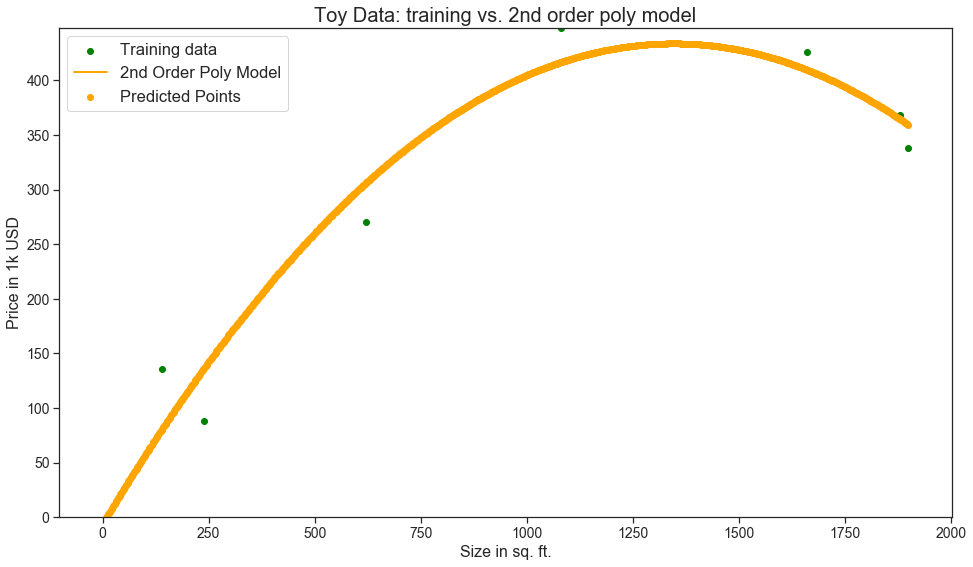

In [127]:
# your code here
x_star = np.linspace(0, x.max(), 1000)

poly2_model = make_poly(x, y, 2) #make poly model with x and y

y_poly_pred = poly2_model.predict(reshape(x_star)) #predict values over 1000 values of x; x_star

ax2, = plt.plot(x_star, y_poly_pred, color="orange") #poly model predictions
ax1 = plt.scatter(x, y, color="green") #scattered data points
ax3 = plt.scatter(x_star, y_poly_pred, color="orange")

plt.ylim(0, y.max())
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price in 1k USD")
plt.legend((ax1, ax2, ax3), ('Training data', '2nd Order Poly Model', 'Predicted Points'))
plt.title("Toy Data: training vs. 2nd order poly model")

### Problem 4.3

Nice that worked well! Let's up the complexity again. Try to play around with the degree and find the one that produces the "best-fitting" model.

**Try this!** Use `make_poly` and try to find the "best-fitting" model by expermenting with the `degree` argument. Store this model in `poly_best_model`. Then, create a plot showing the scattered data points `x, y` and the predicted values of the model. Make sure your graph has the proper components. `HINT` you can use the `r_squared` metric you implemented from before to evaluate the fit of your model.

Text(0.5, 1.0, 'Toy Data: training vs. poly best model (degree 7)')

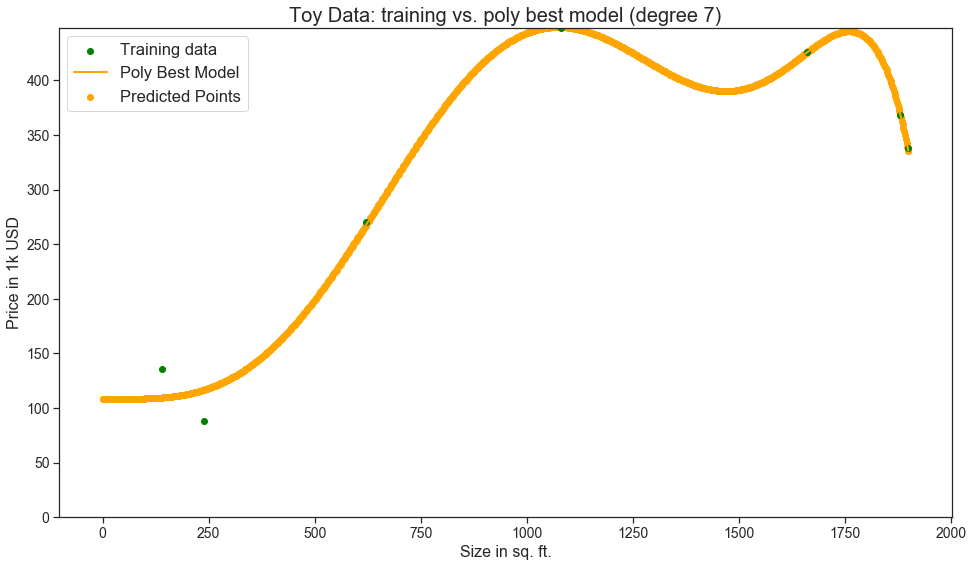

In [129]:
# your code here

poly_best_model = make_poly(x, y, 7)

y_poly_pred2 = poly_best_model.predict(reshape(x_star))

#for r value need to make predictions and labels same size
# r_value = r_squared(y_poly_pred2, y) 
# print(r_value)

#best r-value (closest to 1) was at degree of 7. 0.987 vs. 0.928 w/ degree of 2. Any more, it dropped off. Suggest degree of 7 likely produces
# the best fitting model.

ax2, = plt.plot(x_star, y_poly_pred2, color="orange") #poly model predictions
ax3 = plt.scatter(x_star, y_poly_pred2, color="orange")
ax1 = plt.scatter(x, y, color="green") #scattered data points

plt.ylim(0, y.max())
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price in 1k USD")
plt.legend((ax1, ax2, ax3), ('Training data', 'Poly Best Model', 'Predicted Points'))
plt.title("Toy Data: training vs. poly best model (degree 7)")

### Evaluating the Models

Let's compare the RMSE and $R^2$ metrics for the models that we have produced.

### Problem 4.4

**Try this!** Fill in the following `for` loop to print out the RMSE and $R^2$ metrics for each model in `models`.

In [97]:
models = {
    'Linear': linear_model,
    '2nd Order Polynomial': poly2_model,
    'Best Fitting Polynomial': poly_best_model
}

from sklearn.metrics import r2_score

for name, model in models.items():
    # your code here
    print("r2 score for " + name + " model:")
    print(r2_score(model.predict(reshape(x)), y))
    print("rmse for " + name + " model:")
    print(np.sqrt(mean_squared_error(y, model.predict(reshape(x)))))
    print()

r2 score for Linear model:
0.421453122680845
rmse for Linear model:
78.09774618296683

r2 score for 2nd Order Polynomial model:
0.9219213558492004
rmse for 2nd Order Polynomial model:
34.7167350962079

r2 score for Best Fitting Polynomial model:
0.9864630306458367
rmse for Best Fitting Polynomial model:
14.908669444035457



### Problem 4.5

**Write-up!** What do you notice about the scores? Given these results, which model would you pick to deliver to a client? Why?

### Stacking Up Against the Real Function

What if I told you the true function was $$y = 0.16x + 20$$

The following function, `ground_truth`, will return `x` and `y` values produced by the true function with some added noise. We can use this to produce other points that could have been generated by the same function.

In [98]:
def ground_truth(n):
    '''returns N random samples from the function above'''
    
    w, b = 0.16, 120
    noise = np.random.rand(n) * 300
    noise = noise - np.mean(noise)
    x = np.random.randint(0, 2000, n)
    y = w * x + b + noise
    
    return x, y

### Problem 4.6

**Try this!** With `ground_truth`, make a plot that shows these four things:
1. The points from the toy dataset
2. 200 points generated from the true function
3. The linear model
4. The "best-fit" polynomial model
5. The true function

You don't need to retrain the models for this part. To receive full points, ensure that your plot has all of the proper components, including a legend (see `Lab4` for an example of how to do this).

Text(0.5, 1.0, 'True function, toy data, linear model, best fit poly model')

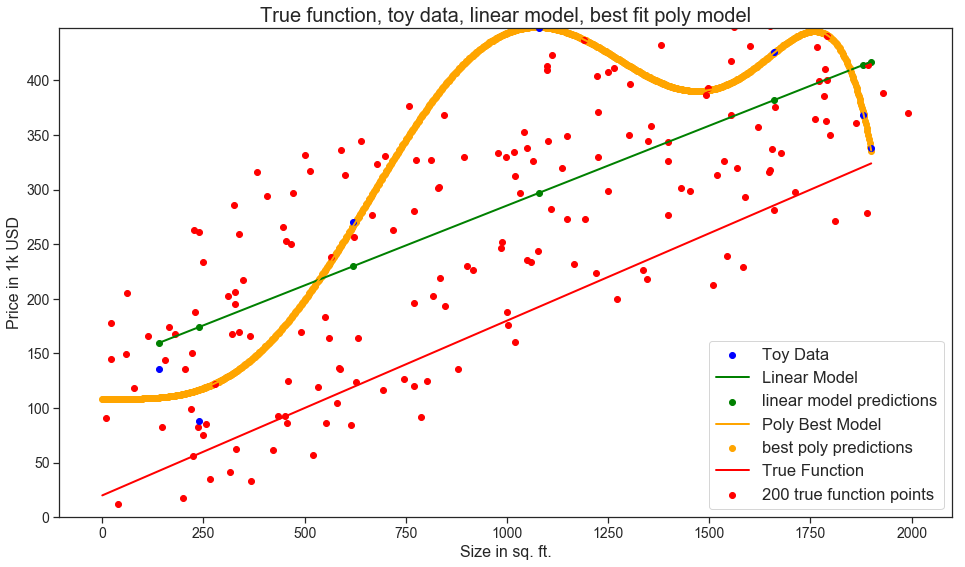

In [137]:
# your code here
new_x, new_y = ground_truth(200) #200 points generated by true func


ax7 = plt.scatter(x, y_pred, color="green") #prediction from linear model
ax2, = plt.plot(x, y_pred, color="green")
ax6 = plt.scatter(x_star, y_poly_pred2, color="orange") #predictions from best poly
ax3, = plt.plot(x_star, y_poly_pred2, color="orange")
ax4 = plt.scatter(new_x, new_y, color="red") #true function scattered points
ax1 = plt.scatter(x, y, color="blue") #points from toy dataset

#true function line
x_true = np.linspace(0, x.max(), 1000)
y_true = 0.16*x_true + 20

ax5, = plt.plot(x_true, y_true, color="red")

plt.ylim(0, y.max())
plt.xlabel("Size in sq. ft.")
plt.ylabel("Price in 1k USD")
plt.legend((ax1, ax2, ax7, ax3, ax6, ax5, ax4), ('Toy Data', 'Linear Model', 'linear model predictions', 'Poly Best Model', 'best poly predictions', 'True Function', '200 true function points'))
plt.title("True function, toy data, linear model, best fit poly model")

### Problem 4.7

**Write-up!** What happened in the plot from [Problem 3.6](#Problem-3.6)? What does the tell us about model complexity? Why must we be careful of the models that we use to analyze our data?

And we're done.